In [ ]:
# !wget -c https://www.dropbox.com/s/8lqrloi0mxj2acu/PH2Dataset.rar

# если по ссылке слишком много запросов, датасет можно скачать с kaggle: https://www.kaggle.com/datasets/kanametov/ph2dataset

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive/')

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d kanametov/ph2dataset

Dataset URL: https://www.kaggle.com/datasets/kanametov/ph2dataset
License(s): unknown
 98% 199M/203M [00:14<00:00, 17.2MB/s]
100% 203M/203M [00:14<00:00, 14.4MB/s]


In [ ]:
!unzip -q ph2dataset.zip

In [ ]:
!ls

PH2Dataset  ph2dataset.zip  sample_data


In [ ]:
# get_ipython().system_raw("unrar x PH2Dataset.rar")

Стуктура датасета у нас следующая:

    IMD_002/
        IMD002_Dermoscopic_Image/
            IMD002.bmp
        IMD002_lesion/
            IMD002_lesion.bmp
        IMD002_roi/
            ...
    IMD_003/
        ...
        ...

 Здесь `X.bmp` — изображение, которое нужно сегментировать, `X_lesion.bmp` — результат сегментации.

Для загрузки датасета можно использовать skimage: [`skimage.io.imread()`](https://scikit-image.org/docs/dev/api/skimage.io.html)

In [ ]:
from skimage.io import imread
import glob
import os

root = 'PH2Dataset/PH2_Dataset/'

images = []
lesions = []

image_pattern = os.path.join(root, '*', '*_Dermoscopic_Image', '*.bmp')
lesion_pattern = os.path.join(root, '*', '*_lesion', '*.bmp')

image_files = glob.glob(image_pattern)
lesion_files = glob.glob(lesion_pattern)

for image_file, lesion_file in zip(image_files, lesion_files):
    images.append(imread(image_file))
    lesions.append(imread(lesion_file))

1. root - Определяется корневая директория, где находятся данные.

2. image_pattern = os.path.join(root, '*', '*_Dermoscopic_Image', '*.bmp') - Формируется шаблон для поиска файлов изображений. Звёздочки (*) обозначают любые символы на соответствующем уровне пути.

3. skimage.io — это подмодуль библиотеки scikit-image (или просто skimage), которая используется для обработки изображений. Модуль io предоставляет функции для загрузки (например, imread) и сохранения изображений, поддерживая различные форматы файлов.

4. imread - Это функция из библиотеки skimage, которая загружает изображение из файла в виде массива пикселей. Она поддерживает различные форматы изображений, включая .bmp, .png, .jpg и другие.

5. glob - Этот модуль позволяет искать файлы по шаблону. Например, можно искать все файлы с расширением .bmp в определенном каталоге.

6. os - Модуль для работы с файловой системой и операционной системой. В данном коде он используется для работы с путями к файлам и папкам.

7. os.path.join - Эта функция объединяет части пути к файлам и папкам в соответствии с операционной системой. Например, на Windows используется обратный слеш (\), а на Linux и Mac — прямой (/).

8. glob.glob - Используется glob.glob, чтобы найти все файлы, соответствующие заданным шаблонам.

9. Цикл for image_file, lesion_file in zip(image_files, lesion_files) - С помощью zip создаются пары из соответствующих файлов изображений и масок.

10. images.append(imread(image_file)) и lesions.append(imread(lesion_file))- Загружаются изображения и маски, и добавляются в соответствующие списки.



In [ ]:
# images = []
# lesions = []
# from skimage.io import imread
# import os
# from glob import glob

# root = 'PH2Dataset/PH2_Dataset/'

# for root, dirs, files in os.walk(os.path.join(root, 'PH2 Dataset images')):
#     if root.endswith('_Dermoscopic_Image'):
#         images.append(imread(os.path.join(root, files[0])))
#     if root.endswith('_lesion'):
#         lesions.append(imread(os.path.join(root, files[0])))

Изображения имеют разные размеры. Давайте изменим их размер на $256\times256 $ пикселей. Для изменения размера изображений можно использовать [`skimage.transform.resize()`](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize).
Эта функция также автоматически нормализует изображения в диапазоне $[0,1]$.


In [ ]:
from skimage.transform import resize
size = (256, 256)
X = [resize(x, size, mode='constant', anti_aliasing=True,) for x in images]
Y = [resize(y, size, mode='constant', anti_aliasing=False) > 0.5 for y in lesions]

1. from skimage.transform import resize:
Импортируется функция resize из модуля skimage.transform, которая изменяет размер изображения.
2. size = (256, 256):
Определяется целевой размер изображения в пикселях: 256x256. Этот размер будет использоваться для всех изображений и масок.
3. X = [resize(x, size, mode='constant', anti_aliasing=True) for x in images]:
Здесь создается новый список X, в который помещаются изображения после изменения их размера.

  resize(x, size, mode='constant', anti_aliasing=True):
  x — это отдельное изображение из списка images.
  size — целевой размер (256x256).
  mode='constant' — это параметр, определяющий, как будут заполняться пиксели за пределами исходного изображения, если размеры не совпадают. В данном случае пустые области заполняются константным значением (обычно черным).
  anti_aliasing=True — включает сглаживание при уменьшении изображения, что делает результат более четким и плавным.
4. Y = [resize(y, size, mode='constant', anti_aliasing=False) > 0.5 for y in lesions]:
Этот код создает список Y, в который помещаются маски (или метки) после изменения их размера.

  resize(y, size, mode='constant', anti_aliasing=False):
  Здесь те же параметры, что и в случае с изображениями, но anti_aliasing=False. Антиалиасинг отключен, так как маски часто содержат бинарные значения (0 и 1, бинарное изображение кодирует два состояния: пиксель либо принадлежит к целевой области (1), либо нет (0)), и сглаживание может нарушить точность границ.

  > 0.5 После изменения размера маски порогуются — все пиксели с значением больше 0.5 превращаются в 1 (белый), остальные — в 0 (черный). Это нужно, чтобы сохранить бинарный формат масок. После изменения размера маски с помощью resize, значения пикселей могут перестать быть строго 0 или 1. Например, при изменении размеров изображений алгоритм может создавать промежуточные значения (например, 0.3 или 0.7) из-за интерполяции, особенно если включено сглаживание (антиалиасинг).

  Для сохранения маски в бинарном виде и удаления "серых" промежуточных значений используется порог > 0.5:
  Все значения пикселей больше 0.5 становятся 1 (белый), остальные — 0 (черный).

Резюме:

Код изменяет размер изображений и масок до 256x256 пикселей.

Для изображений включено сглаживание (антиалиасинг), чтобы улучшить качество при изменении размера.

Маски сохраняются в бинарном формате после изменения размера, чтобы они корректно отображали области поражения.

In [ ]:
import numpy as np
X = np.array(X, np.float32)
Y = np.array(Y, np.float32)
print(f'Loaded {len(X)} images')

Loaded 200 images


Импортируется библиотека NumPy, которая является основным инструментом для работы с массивами и матрицами в Python.

X = np.array(X, np.float32):
Преобразует список X (который ранее содержал изображения в виде списков или массивов) в массив NumPy с типом данных float32.

Зачем это нужно?
NumPy массивы обеспечивают высокую производительность при работе с числовыми данными, что важно при обработке изображений.
Формат float32 используется для экономии памяти и обеспечения точности. Это особенно полезно, так как изображения обычно хранят значения пикселей в диапазоне от 0 до 1, и формат float32 достаточно точен для таких данных.

In [ ]:
len(lesions)

200

Чтобы убедиться, что все корректно, мы нарисуем несколько изображений

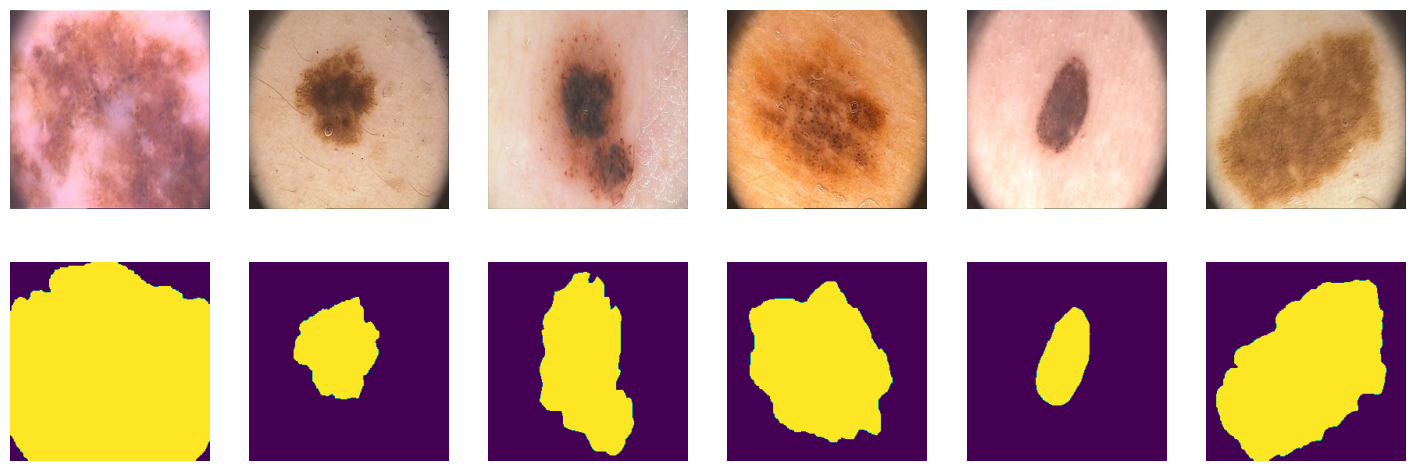

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

plt.figure(figsize=(18, 6))
for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.axis("off")
    plt.imshow(X[i])

    plt.subplot(2, 6, i+7)
    plt.axis("off")
    plt.imshow(Y[i])
plt.show();

1. import matplotlib.pyplot as plt:
Импортируется библиотека Matplotlib, которая используется для построения графиков и визуализации данных. Здесь она будет использоваться для отображения изображений.
2. from IPython.display import clear_output:
Импортируется функция clear_output из модуля IPython. Эта функция полезна в Jupyter Notebook для очистки вывода (например, для обновления графиков), но в данном коде она не используется.
3. plt.figure(figsize=(18, 6)):
Создается новая фигура (контейнер для графиков) размером 18x6 дюймов. Это задает общий размер отображаемого пространства, то есть весь график.
4. for i in range(6)::
Начинается цикл, который повторяется 6 раз. Цикл используется для отображения первых шести изображений и их масок.
5. plt.subplot(2, 6, i+1):
Создается подграфик в сетке размером 2 строки и 6 столбцов. Параметр i+1 определяет положение текущего подграфика.
В первой строке будут отображаться оригинальные изображения.
6. plt.axis("off"):
Отключается отображение осей, чтобы изображение отображалось без рамок и шкал.
7. plt.imshow(X[i]):
Отображается изображение из массива X (с исходными изображениями). Здесь берется изображение под индексом i (от 0 до 5).
8. plt.subplot(2, 6, i+7):
В сетке создается еще один подграфик, но уже во второй строке (поэтому используется i+7). Это позволяет располагать маски под соответствующими изображениями.
9. plt.imshow(Y[i]):
Отображается соответствующая маска из массива Y. Опять же, выбирается элемент с индексом i (от 0 до 5), но теперь это маска.
10. plt.show();:
После завершения цикла все подграфики выводятся на экран. Это завершает построение и отображение графиков.


Разделим наши 200 картинок на 100/50/50
 для обучения, валидации и теста соответственно

In [ ]:
ix = np.random.choice(len(X), len(X), False)
tr, val, ts = np.split(ix, [100, 150])

In [ ]:
print(len(tr), len(val), len(ts))

100 50 50


Этот код выполняет случайное перемешивание индексов и разделение данных на тренировочный, валидационный и тестовый наборы.

1. ix = np.random.choice(len(X), len(X), False):
np.random.choice(len(X), len(X), False) — выбирает случайные индексы из диапазона от 0 до len(X)-1 (количество элементов в X) без повторений.
Аргументы функции:
len(X) — диапазон чисел, из которых выбираются индексы (от 0 до len(X)-1).
len(X) — количество случайно выбранных индексов (то есть все индексы).
False (или replace=False) — означает, что индексы выбираются без замены, т.е. повторений не будет.
В результате переменная ix содержит перемешанные индексы всех элементов в X.

2. tr, val, ts = np.split(ix, [100, 150]):
np.split(ix, [100, 150]) — делит массив индексов ix на три части:
Первые 100 индексов идут в тренировочный набор (tr).
Следующие 50 индексов (с 100 по 149) идут в валидационный набор (val).
Оставшиеся индексы (с 150 до конца) идут в тестовый набор (ts).
В итоге:
tr содержит 100 случайных индексов.
val содержит 50 случайных индексов.
ts содержит оставшиеся индексы.
Зачем это нужно?
Этот код полезен для случайного разделения данных на тренировочный, валидационный и тестовый наборы. После этого разделенные индексы можно использовать для извлечения соответствующих данных из массива X и их дальнейшего использования в обучении модели.


Как это работает:
Перемешиваются индексы, а не сами данные:

Когда ты вызываешь np.random.choice для создания перемешанного списка индексов, порядок данных в X и Y пока не изменяется.
Например, если у тебя были 10 пар изображений и масок:
Индексы: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
После перемешивания (например, результатом будет): [7, 3, 9, 0, 4, 1, 6, 8, 2, 5].
Используются одинаковые индексы для X и Y:

Когда ты делишь данные на тренировочный, валидационный и тестовый наборы, индексы (tr, val, ts) используются одинаково как для X, так и для Y.

Это гарантирует, что перемешивание не нарушит соответствие между изображениями и их масками. То есть, если в изначальных данных X[0] соответствует маска Y[0], после перемешивания, если индекс 0 переместился на новое место, то и в Y этот индекс будет соответствовать тому же новому месту.

Итог:
Перемешивание происходит на уровне индексов, и эти же индексы используются для извлечения данных из X и Y.
Соответствие между изображениями и масками сохраняется, потому что оба массива (и X, и Y) индексируются одинаково.

#### PyTorch DataLoader

In [ ]:
from torch.utils.data import DataLoader
batch_size = 10
data_tr = DataLoader(list(zip(np.rollaxis(X[tr], 3, 1), Y[tr, np.newaxis])),
                     batch_size=batch_size, shuffle=True)
data_val = DataLoader(list(zip(np.rollaxis(X[val], 3, 1), Y[val, np.newaxis])),
                      batch_size=batch_size, shuffle=True)
data_ts = DataLoader(list(zip(np.rollaxis(X[ts], 3, 1), Y[ts, np.newaxis])),
                     batch_size=batch_size, shuffle=True)



DataLoader — это компонент библиотеки PyTorch, который используется для создания итераторов данных, позволяющих загружать данные пакетами (батчами) во время обучения нейронной сети. Он выполняет несколько ключевых задач:

Управление батчами (batching): разделяет данные на пакеты (батчи) заданного размера.
Перемешивание данных (shuffling): если указано, может перемешивать данные перед каждым проходом.
Параллельная загрузка данных: может использовать несколько потоков для ускорения загрузки.

1. Импорт DataLoader:

from torch.utils.data import DataLoader

Этот импорт предоставляет класс DataLoader, который будет использоваться для создания итераторов.

2. Задание размера батча:


batch_size = 10

Здесь задается размер батча — 10. Это означает, что данные будут подаваться в модель по 10 изображений за раз.

3. Подготовка тренировочного набора данных:


data_tr = DataLoader(list(zip(np.rollaxis(X[tr], 3, 1), Y[tr, np.newaxis])),
                     batch_size=batch_size, shuffle=True)

X[tr]: Выбор данных по перемешанным тренировочным индексам.
np.rollaxis(X[tr], 3, 1): Эта операция меняет порядок осей в массиве. Обычно изображения имеют форму (количество_изображений, высота, ширина, каналы), но в PyTorch ожидается формат (количество_изображений, каналы, высота, ширина). Функция np.rollaxis меняет положение осей для этого.
В данном случае ось с индексом 3 (каналы) перемещается на место оси 1.

Y[tr, np.newaxis]: Добавление новой оси в масках (то есть преобразование их в форму (количество_изображений, 1, высота, ширина), где 1 — это фиктивный канал). Это нужно, чтобы соответствовать формату данных PyTorch.
list(zip(...)): zip объединяет изображения и соответствующие маски в пары. Это позволяет передавать данные как (изображение, маска) на каждом шаге.

4. DataLoader(..., batch_size=batch_size, shuffle=True):

Создается итератор данных:

batch_size=batch_size: Данные будут подаваться батчами по 10 элементов.
shuffle=True: Данные будут перемешиваться перед каждым проходом (эпохой).

5. Подготовка валидационного и тестового наборов:
Код для валидационного (data_val) и тестового (data_ts) наборов аналогичен, но используются соответствующие индексы (val и ts).

Итог
Этот код создает три итератора данных (data_tr, data_val, data_ts) для тренировочного, валидационного и тестового наборов:

Данные подаются в модель пакетами по 10 изображений.
Изображения и их маски связаны друг с другом и правильно подготовлены для использования в PyTorch.
Перед каждой эпохой данные перемешиваются, чтобы улучшить обучение.
DataLoader упрощает работу с данными, особенно когда нужно управлять батчами и обеспечивать перемешивание.

1. Зачем перемешивать данные перед каждым батчем, если мы уже перемешали их ранее?
Перемешивание данных перед каждой эпохой (и, как следствие, перед каждым батчем) — это общая практика в машинном обучении, особенно в нейронных сетях. Вот зачем это нужно:

* Улучшение обобщающей способности модели: Перемешивание помогает избежать того, чтобы модель "запомнила" определенный порядок данных, что может привести к переобучению. Если данные не перемешиваются, модель может увидеть одинаковые или похожие образцы в одном и том же порядке на каждой эпохе, что может снизить ее способность обобщать на новые данные.

* Более равномерное обновление весов: Перемешивание гарантирует, что в каждом батче будет разнообразный набор данных. Это помогает более равномерно обновлять веса модели и ускоряет процесс обучения.

* Обеспечение случайности: Даже если данные один раз перемешаны в начале, при многократных проходах через датасет (эпохах) фиксированный порядок может не учитывать разные случайные комбинации, что снижает эффективность обучения.

2. Почему мы передаем только три переменные в np.rollaxis(X[tr], 3, 1)?
Функция np.rollaxis работает с осями многомерных массивов. В случае с изображениями формат данных по умолчанию часто выглядит так: (количество_изображений, высота, ширина, каналы).

Давай разберем, что делают три аргумента:

np.rollaxis(X[tr], 3, 1)

Первый аргумент (X[tr]): Это массив, который содержит изображения в формате (количество_изображений, высота, ширина, каналы).

Второй аргумент (3): Это индекс оси, которую мы хотим переместить. Здесь указано 3, что соответствует оси, отвечающей за каналы изображения (например, RGB-каналы).

Третий аргумент (1): Это новая позиция для перемещаемой оси. Мы хотим переместить ось с каналами на место сразу после оси с количеством изображений. После этой операции формат массива станет (количество_изображений, каналы, высота, ширина) — именно этот формат ожидается в PyTorch.

Как это работает?
Исходный формат: (количество_изображений, высота, ширина, каналы).
После np.rollaxis(X[tr], 3, 1) формат становится: (количество_изображений, каналы, высота, ширина).

Почему передаются именно три аргумента?
Первый аргумент — это сам массив (X[tr]).
Второй аргумент — индекс оси, которую нужно переместить (в данном случае, ось с каналами 3).
Третий аргумент — новая позиция для перемещаемой оси (1).
Эти три аргумента позволяют эффективно изменить порядок осей, чтобы соответствовать формату, ожидаемому в PyTorch.

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda



Этот код определяет, какое устройство будет использоваться для выполнения вычислений в PyTorch: графический процессор (GPU) или центральный процессор (CPU).
1. torch.device: это объект, который указывает, на каком устройстве будут выполняться вычисления: на CPU или GPU.
В PyTorch device используется для переноса данных и моделей на конкретное устройство.
2. torch.cuda.is_available():
Функция torch.cuda.is_available() проверяет, доступна ли в системе видеокарта с поддержкой CUDA. Если видеокарта с поддержкой CUDA установлена и драйверы настроены, эта функция вернет True.
Если CUDA доступна, то вычисления могут быть выполнены на GPU, что обычно значительно ускоряет процесс обучения нейронных сетей.
3. Выбор устройства: cuda или cpu:
Выражение 'cuda' if torch.cuda.is_available() else 'cpu' определяет, какое устройство будет использоваться:
Если CUDA доступна (GPU с поддержкой CUDA), выбирается 'cuda'.
Если CUDA недоступна (например, если на машине только CPU), выбирается 'cpu'.
4. print(device):
Эта строка выводит, какое устройство было выбрано: cuda (если доступен GPU) или cpu (если используется только центральный процессор).
Пример вывода:
Если у вас есть доступ к GPU с поддержкой CUDA, вывод будет: cuda.
Если GPU недоступен или не поддерживает CUDA, вывод будет: cpu.

Применение:
Этот код позволяет адаптивно использовать доступные ресурсы для выполнения вычислений. В большинстве случаев, если GPU доступен, его выбирают, так как он значительно ускоряет обучение моделей, особенно глубоких нейронных сетей.



# Реализация различных архитектур:
Ваше задание будет состоять в том, чтобы написать несколько нейросетевых архитектур для решения задачи семантической сегментации. Сравнить их по качеству на тесте и испробовать различные лосс функции для них.

-----------------------------------------------------------------------------------------

# SegNet [2 балла]

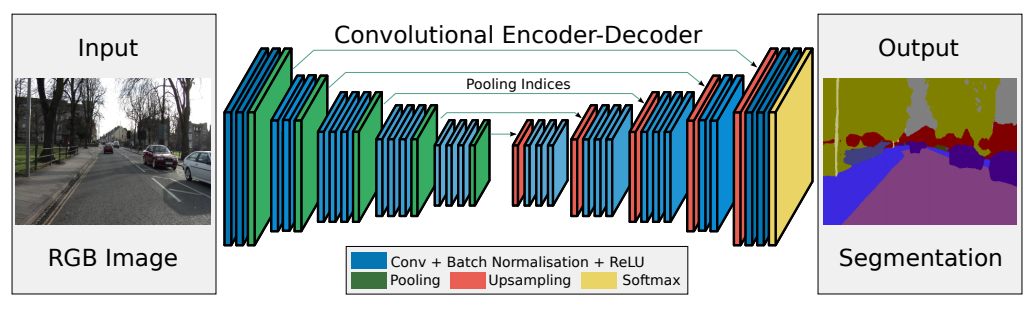

* Badrinarayanan, V., Kendall, A., & Cipolla, R. (2015). [SegNet: A deep convolutional
encoder-decoder architecture for image segmentation](https://arxiv.org/pdf/1511.00561.pdf)

Внимательно посмотрите из чего состоит модель и для чего выбраны те или иные блоки.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.optim as optim
from time import time

from matplotlib import rcParams
rcParams['figure.figsize'] = (15,4)

Этот код на Python включает в себя импорт необходимых библиотек и модулей для создания и обучения нейронных сетей с использованием фреймворка PyTorch. Давайте рассмотрим каждую часть кода подробнее:

1) torch: Основная библиотека PyTorch, которая предоставляет функционал для работы с тензорами, автоматического дифференцирования и других вычислений на GPU.

2) torch.nn: Подмодуль PyTorch, который содержит классы и функции для создания нейронных сетей (например, слои, потери и т.д.).

3) torch.nn.functional: Модуль с функциями для различных операций над тензорами, которые используются в нейронных сетях (например, активационные функции, свертки, пулинги и т.д.).

4) torchvision.models: Модуль, предоставляющий предобученные модели (например, ResNet, VGG и другие), которые можно использовать для различных задач компьютерного зрения.

5) torch.optim: Модуль для создания оптимизаторов, которые используются для обновления весов нейронной сети во время обучения.

6) time: Модуль для работы со временем, в данном случае импортируется функция time, которая возвращает текущее время (используется для измерения времени выполнения кода).

Настройка параметров графики:

1) matplotlib.rcParams: Словарь глобальных параметров конфигурации для matplotlib (библиотека для создания графиков и визуализации данных).

2) rcParams['figure.figsize'] = (15, 4): Устанавливает размер графиков по умолчанию. В данном случае, ширина графика будет 15 единиц, а высота — 4 единицы. Это используется для того, чтобы все графики, построенные с помощью matplotlib, имели этот размер.


Итог:
Этот код импортирует необходимые библиотеки и настраивает размер графиков. Это предварительная настройка, перед созданием нейронной сети, обучением модели или визуализацией данных.

In [ ]:
import torch.nn as nn

class SegNet(nn.Module): #создаем объект класса nn.Module под названием SegNet
    def __init__(self, in_channels, out_channels): # self позволяет объекту класса обращаться к своим атрибутам и методам.
                                                   # Конструктор (__init__) инициализирует новый объект с нужными параметрами.
                                                   # Количество каналов важно для правильного функционирования слоев нейронной сети,
                                                   # так как определяет, как данные будут проходить через сеть.
        super(SegNet, self).__init__() # super() — это встроенная функция в Python, которая позволяет вам вызывать методы родительского
                                                   # класса (в данном случае nn.Module) внутри дочернего класса (в данном случае SegNet).

        # Encoder (downsampling)
        self.enc_conv0 = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
        )
        self.pool0 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.enc_conv1 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
        )
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.enc_conv2 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
        )
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.enc_conv3 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
        )
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Bottleneck
        self.bottleneck_conv = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
        )

        # Decoder (upsampling)
        self.upsample0 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.dec_conv0 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.Conv2d(512, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
        )

        self.upsample1 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.dec_conv1 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
        )

        self.upsample2 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.dec_conv2 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
        )

        self.upsample3 = nn.Upsample(scale_factor=2, mode='bilinear')
        self.dec_conv3 = nn.Sequential(
            nn.Conv2d(64, out_channels, kernel_size=3, stride=1, padding=1),
            # No activation in the last layer for segmentation
        )

    def forward(self, x):
        # Encoder
        e0 = self.enc_conv0(x)
        e1 = self.pool0(e0)
        e2 = self.enc_conv1(e1)
        e3 = self.pool1(e2)
        e4 = self.enc_conv2(e3)
        e5 = self.pool2(e4)
        e6 = self.enc_conv3(e5)
        e7 = self.pool3(e6)

        # Bottleneck
        b = self.bottleneck_conv(e7)

        # Decoder
        d0 = self.upsample0(b)
        d0 = self.dec_conv0(d0)
        d1 = self.upsample1(d0)
        d1 = self.dec_conv1(d1)
        d2 = self.upsample2(d1)
        d2 = self.dec_conv2(d2)
        d3 = self.upsample3(d2)
        d3 = self.dec_conv3(d3)

        return d3
        # Этот блок кода выполняет полный прямой проход через сегментационную нейросеть,
        # состоящую из энкодера (сверточных блоков и max-pooling), боттлнека (сжатие признаков)
        # и декодера (апсемплинг для восстановления пространственного разрешения).



In [ ]:
def iou_pytorch(outputs: torch.Tensor, labels: torch.Tensor):
    # You can comment out this line if you are passing tensors of equal shape
    # But if you are passing output from UNet or something it will most probably
    # be with the BATCH x 1 x H x W shape
    outputs = outputs.squeeze(1) # BATCH x 1 x H x W => BATCH x H x W
    labels = labels.squeeze(1).byte()
    print(outputs)
    print(labels)
    SMOOTH = 1e-8
    intersection = (outputs & labels).float().sum((1, 2))  # Will be zero if Truth=0 or Prediction=0
    union = (outputs | labels).float().sum((1, 2))         # Will be zzero if both are 0

    iou = (intersection + SMOOTH) / (union + SMOOTH)  # We smooth our devision to avoid 0/0

    thresholded = torch.clamp(20 * (iou - 0.5), 0, 10).ceil() / 10  # This is equal to comparing with thresolds

    return thresholded  #

def iou_score(logits, labels, threshold=0.5):
    predictions = (torch.sigmoid(logits) > threshold).float()

    intersection = torch.sum(predictions * labels)
    union = torch.sum(predictions) + torch.sum(labels) - intersection

    iou = intersection / union if union != 0 else 0.0
    return iou.item()


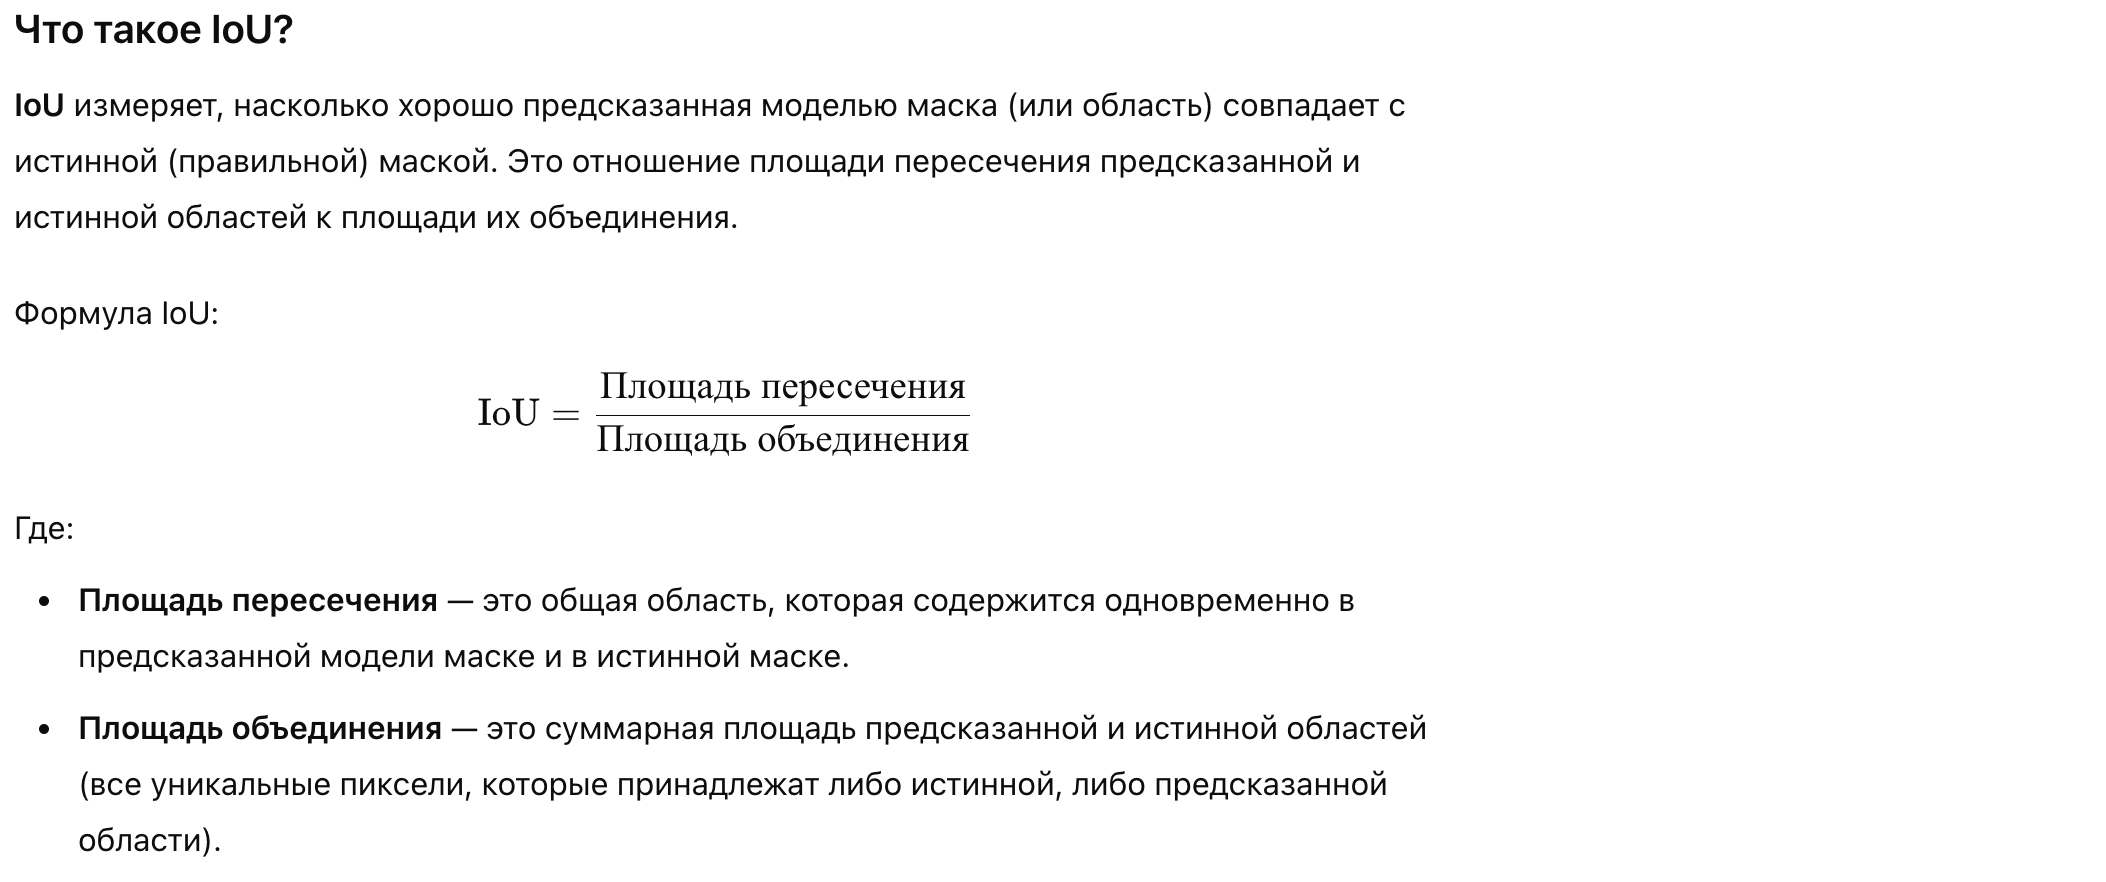

Пример

Представьте, что у вас есть объект (например, машина) на изображении, и вы хотите оценить, насколько хорошо модель предсказала, где находится этот объект.

Истинная маска — это область, которая содержит объект (машину), как известно заранее.

Предсказанная маска — это область, которую предсказала модель как машину.
Теперь представьте, что вы накладываете эти две области друг на друга:

1. Пересечение — это область, где предсказанная и истинная маски совпадают.

2. Объединение — это вся область, покрытая обеими масками.

Значение IoU

* IoU = 1: Идеальное совпадение. Предсказанная маска точно совпадает с истинной маской.
* IoU = 0: Нет пересечения. Предсказанная маска полностью не совпадает с истинной.
* IoU между 0 и 1: Частичное совпадение. Чем ближе к 1, тем лучше предсказание.

Важность IoU

IoU — это важная метрика, потому что она учитывает как ложные срабатывания (когда предсказание захватывает ненужные области), так и пропущенные области (когда модель не предсказывает истинные области). Чем больше IoU, тем точнее предсказания модели.

Эта метрика часто используется в задачах:

1. Семантической сегментации (разметка каждого пикселя изображения по классам).
2. Детектирования объектов (обнаружение объектов на изображениях, например, с помощью ограничивающих рамок).

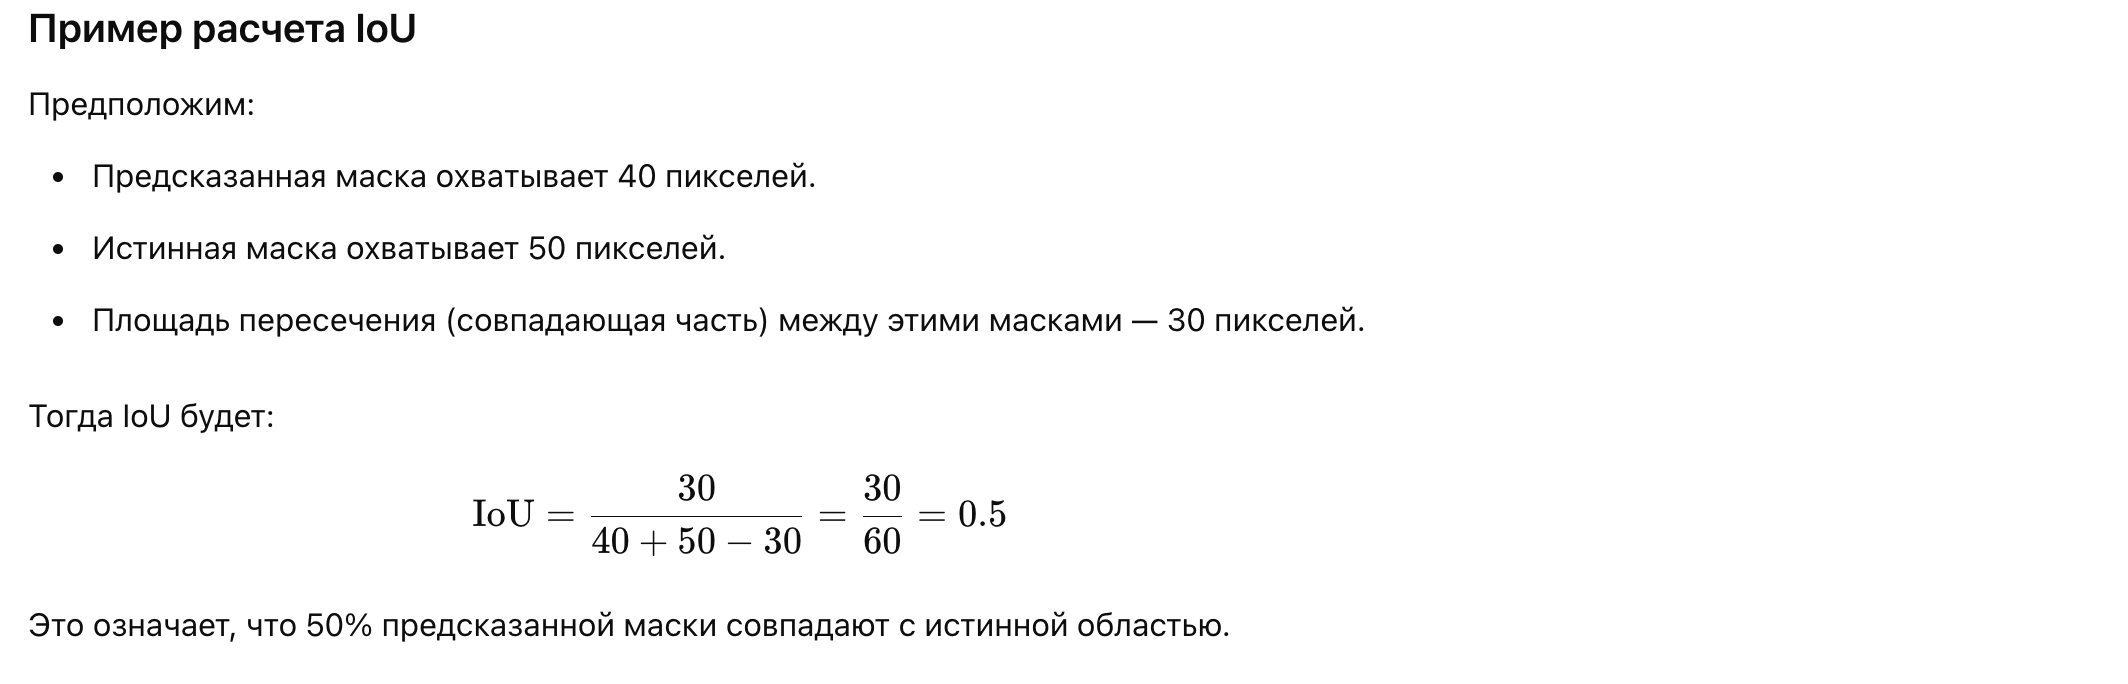

iou_pytorch: Рассчитывает IoU для каждого изображения в пакете, применяя логические операции "и" (пересечение) и "или" (объединение) к бинарным предсказаниям и истинным меткам. Применяет пороговое преобразование к IoU для получения дискретных значений IoU (например, округляет IoU выше 0.5).

iou_score: Вычисляет IoU для бинаризованных предсказаний после применения функции сигмоиды. Это более традиционный способ расчета IoU, который напрямую делит пересечение на объединение.

## Функция потерь [1 балл]

Не менее важным, чем построение архитектуры, является определение **оптимизатора** и **функции потерь.**

Функция потерь - это то, что мы пытаемся минимизировать. Многие из них могут быть использованы для задачи бинарной семантической сегментации.

Популярным методом для бинарной сегментации является *бинарная кросс-энтропия*, которая задается следующим образом:

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

где $y$ это  таргет желаемого результата и $\hat y$ является выходом модели. $\sigma$ - это [*логистическая* функция](https://en.wikipedia.org/wiki/Sigmoid_function), который преобразует действительное число $\mathbb R$ в вероятность $[0,1]$.

Однако эта потеря страдает от проблем численной нестабильности. Самое главное, что $\lim_{x\rightarrow0}\log(x)=\infty$ приводит к неустойчивости в процессе оптимизации. Рекомендуется посмотреть следующее [упрощение](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits). Эта функция эквивалентна первой и не так подвержена численной неустойчивости:

$$\mathcal L_{BCE} = \hat y - y\hat y + \log\left(1+\exp(-\hat y)\right).$$

In [ ]:
def bce_loss(y_real, y_pred):
    y_pred = torch.clamp(y_pred, min=1e-7, max=1-1e-7)

    loss = - (y_real * torch.log(y_pred) + (1 - y_real) * torch.log(1 - y_pred))

    loss = torch.mean(loss)

    return loss

## Тренировка

Мы определим цикл обучения в функции, чтобы мы могли повторно использовать его.

In [ ]:
def train(model, opt, loss_fn, epochs, data_tr, data_val):
    X_val, Y_val = next(iter(data_val))

    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        tic = time()
        print('* Epoch %d/%d' % (epoch+1, epochs))

        avg_loss = 0
        model.train()  # train mode
        for X_batch, Y_batch in data_tr:
            # data to device
            X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
            # set parameter gradients to zero
            opt.zero_grad()
            # forward
            Y_pred = model(X_batch)
            loss = loss_fn(Y_pred, Y_batch) # forward-pass
            # backward-pass
            loss.backward()
            # update weights
            opt.step()

            # calculate loss to show the user
            avg_loss += loss.item() / len(data_tr)
        train_losses.append(avg_loss)
        toc = time()
        print('Train Loss: %f' % avg_loss)

        # show intermediate results
        model.eval()  # testing mode
        Y_hat = model(X_val.to(device)).cpu().detach() # detach and put into cpu
        Y_val_pred = model(X_val.to(device))
        val_loss = loss_fn(Y_val_pred, Y_val.to(device)).item() / len(data_val)
        val_losses.append(val_loss)
        print('Validation Loss: %f' % val_loss)

        # Visualize tools
        clear_output(wait=True)
        for k in range(6):
            plt.subplot(2, 6, k+1)
            plt.imshow(np.rollaxis(X_val[k].numpy(), 0, 3), cmap='gray')
            plt.title('Real')
            plt.axis('off')

            plt.subplot(2, 6, k+7)
            plt.imshow(Y_hat[k, 0], cmap='gray')
            plt.title('Output')
            plt.axis('off')
        plt.suptitle('%d / %d - loss: %f' % (epoch+1, epochs, avg_loss))
        plt.show()

    return train_losses, val_losses

## Инференс

После обучения модели эту функцию можно использовать для прогнозирования сегментации на новых данных:

In [ ]:
def predict(model, data):
    model.eval()  # testing mode
    Y_pred = [X_batch for X_batch, _ in data]
    return np.array(Y_pred)

In [ ]:
def find_gt_mask(Y_pred, threshold=0.5):
    Y_pred_binary = (torch.sigmoid(Y_pred) > threshold).float()
    return Y_pred_binary

def score_model(model, metric, data, threshold=0.5):
    model.eval()  # testing mode
    scores = 0
    for X_batch, Y_label in data:
        X_batch, Y_label = X_batch.to(device), Y_label.to(device)
        Y_pred = model(X_batch)

        # Compute IoU score
        iou = metric(Y_pred, Y_label, threshold)

        print(f"IoU Score: {iou}")

        scores += iou

    return scores / len(data)


Возвращаемое значение: среднее значение метрики по всему набору данных.

Задача функций:

find_gt_mask используется для получения бинарной маски из предсказаний модели (особенно в задачах сегментации).

score_model оценивает модель с использованием заданной метрики на всем наборе данных и возвращает средний результат (например, средний IoU).

## Основной момент: обучение

Обучите вашу модель. Обратите внимание, что обучать необходимо до сходимости. Если указанного количества эпох (20) не хватило, попробуйте изменять количество эпох до сходимости алгоритма. Сходимость определяйте по изменению функции потерь на валидационной выборке.
 С параметрами оптимизатора можно спокойно играть, пока вы не найдете лучший вариант для себя.


In [ ]:
model = SegNet(3, 1).to(device)
# print(model)

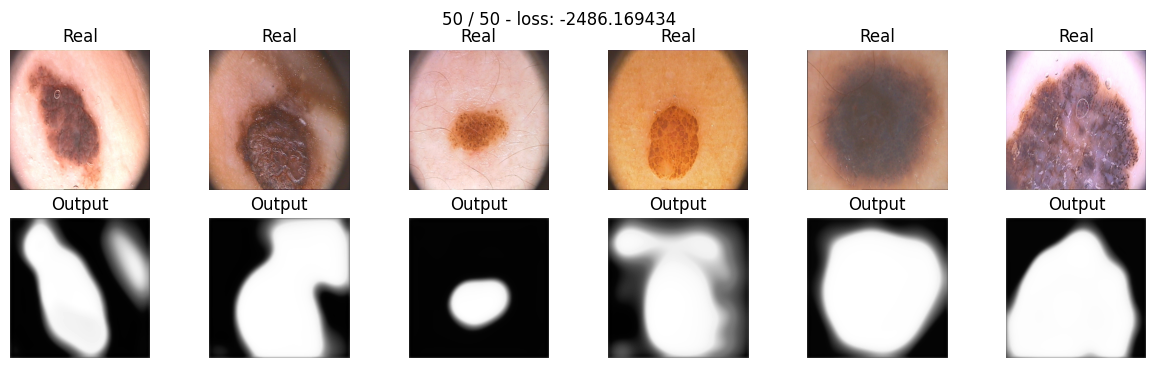

In [ ]:
max_epochs = 50
optimizer = optim.Adam(model.parameters(), lr=0.001)
train_losses, val_losses = train(model, optimizer, bce_loss, max_epochs, data_tr, data_val)

In [ ]:
score_model(model, iou_score, data_val, threshold=0.5)

IoU Score: 0.7442587018013
IoU Score: 0.7405906319618225


0.7424246668815613

In [ ]:
 def plot_learning_curve(train_losses, val_losses):
      # Plot the learning curve
      plt.figure(figsize=(12, 5))
      plt.subplot(1, 2, 1)
      plt.plot(train_losses, label='Training Loss')
      plt.plot(val_losses, label='Validation Loss')
      plt.xlabel('Epoch')
      plt.ylabel('Loss')
      plt.legend()

Ответьте себе на вопрос: не переобучается ли моя модель?

Судя по кривой обучения, модель начинает переобучаться после примерно 30 эпох.

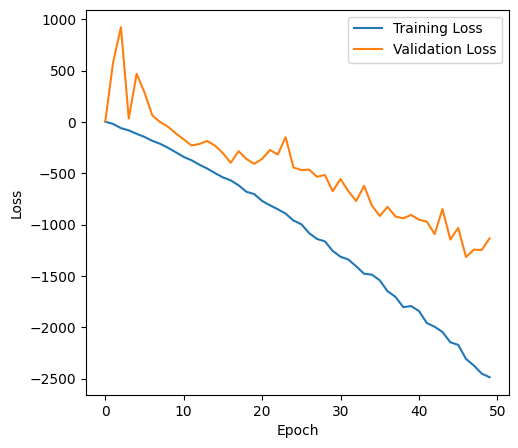

In [ ]:
plot_learning_curve(train_losses, val_losses)

[**2. Focal loss:**](https://arxiv.org/pdf/1708.02002.pdf)

Окей, мы уже с вами умеем делать BCE loss:

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Проблема с этой потерей заключается в том, что она имеет тенденцию приносить пользу классу **большинства** (фоновому) по отношению к классу **меньшинства** ( переднему). Поэтому обычно применяются весовые коэффициенты к каждому классу:

$$\mathcal L_{wBCE}(y, \hat y) = -\sum_i \alpha_i\left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Традиционно вес $\alpha_i$ определяется как обратная частота класса этого пикселя $i$, так что наблюдения миноритарного класса весят больше по отношению к классу большинства.

Еще одним недавним дополнением является взвешенный пиксельный вариант, которая взвешивает каждый пиксель по степени уверенности, которую мы имеем в предсказании этого пикселя.

$$\mathcal L_{focal}(y, \hat y) = -\sum_i \left[\left(1-\sigma(\hat y_i)\right)^\gamma y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Зафиксируем значение $\gamma=2$.

--------------------------------------------------------------------------------


In [ ]:
def focal_loss(y_real, y_pred, eps = 1e-8, gamma = 2):
    y_pred = torch.clamp(y_pred, eps, 1.0 - eps)

    focal_loss = -torch.sum(y_real * (1 - y_pred) ** gamma * torch.log(y_pred))

    return focal_loss


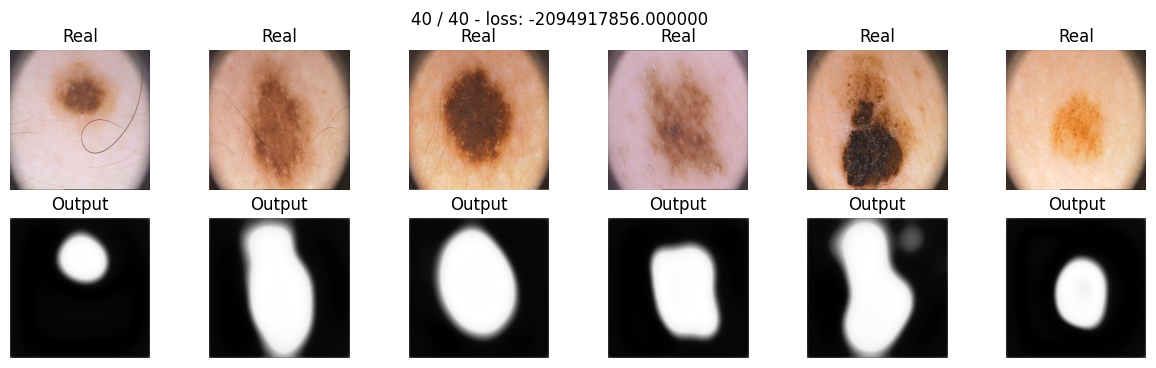

In [ ]:
model_focal = SegNet(3, 1).to(device)

max_epochs = 40
optimaizer = optim.Adam(model_focal.parameters())
train_losses, val_losses = train(model_focal, optimaizer, focal_loss, max_epochs, data_tr, data_val)

In [ ]:
score_model(model_dice, iou_score, data_val, threshold=0.5)

IoU Score: 0.7121374607086182
IoU Score: 0.6939781904220581


0.7030578255653381

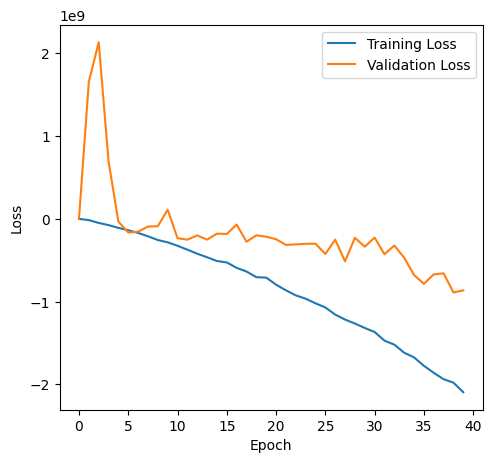

In [ ]:
plot_learning_curve(train_losses, val_losses)

----------------------------------------------------------------------------------------------

##Мир сегментационных лоссов

В данном блоке предлагаем вам написать одну функцию потерь самостоятельно. Для этого необходимо прочитать статью и имплементировать ее. Кроме тако провести численное сравнение с предыдущими функциями.
Какие варианты?

1) Можно учесть Total Variation
2) Lova
3) BCE но с Soft Targets (что-то типа label-smoothing для многослассовой классификации)
4) Любой другой

* [Physiological Inspired Deep Neural Networks for Emotion Recognition](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8472816&tag=1)". IEEE Access, 6, 53930-53943.

* [Boundary loss for highly unbalanced segmentation](https://arxiv.org/abs/1812.07032)

* [Tversky loss function for image segmentation using 3D fully convolutional deep networks](https://arxiv.org/abs/1706.05721)

* [Correlation Maximized Structural Similarity Loss for Semantic Segmentation](https://arxiv.org/abs/1910.08711)

* [Topology-Preserving Deep Image Segmentation](https://papers.nips.cc/paper/8803-topology-preserving-deep-image-segmentation)

Так как Тверский лосс очень похож на данные выше, то за него будет проставлено только 3 балла (при условии, если в модели нет ошибок при обучении). Постарайтесь сделать что-то интереснее.

In [ ]:
# Lovász-Softmax loss

In [ ]:
import torch
import torch.nn.functional as F

def lovasz_grad(gt_sorted):
    """
    Compute gradient of the Lovász hinge loss.
    """
    gts = torch.sum(gt_sorted)
    intersection = gts - torch.cumsum(gt_sorted, dim=0)
    union = gts + torch.cumsum(1 - gt_sorted, dim=0)
    jaccard = 1.0 - intersection / union
    jaccard = torch.cat((jaccard[0:1], jaccard[1:] - jaccard[:-1]))
    return jaccard

def lovasz_softmax_flat(logits, labels):
    """
    Compute the Lovász hinge loss for a flat prediction.
    """
    labels_size = labels.size()
    logits = logits.view(-1)
    labels = labels.view(-1)

    indices = torch.argsort(logits, descending=True)
    logits_sorted = logits[indices]
    labels_sorted = labels[indices]

    gt_sorted = labels_sorted.float()
    grad = lovasz_grad(gt_sorted)

    loss = torch.dot(F.relu(logits_sorted), grad)
    return loss

def lovasz_softmax(logits, labels):
    """
    Compute the Lovász hinge loss for a batch of predictions.
    """
    losses = []
    for logit, label in zip(logits, labels):
        losses.append(lovasz_softmax_flat(logit, label))
    return torch.stack(losses)

class LovaszSoftmaxLoss(torch.nn.Module):
    def __init__(self):
        super(LovaszSoftmaxLoss, self).__init__()

    def forward(self, logits, labels):
        return lovasz_softmax(logits, labels)


-----------------------------------------------------------------------------------------

# U-Net

[**U-Net**](https://arxiv.org/abs/1505.04597) — это архитектура нейронной сети, которая получает изображение и выводит его. Первоначально он был задуман для семантической сегментации (как мы ее будем использовать), но он настолько успешен, что с тех пор используется в других контекстах. Получая на вход медицинское изображение, он выведет изображение в оттенках серого, где интенсивность каждого пикселя зависит от вероятности того, что этот пиксель принадлежит интересующей нас области.

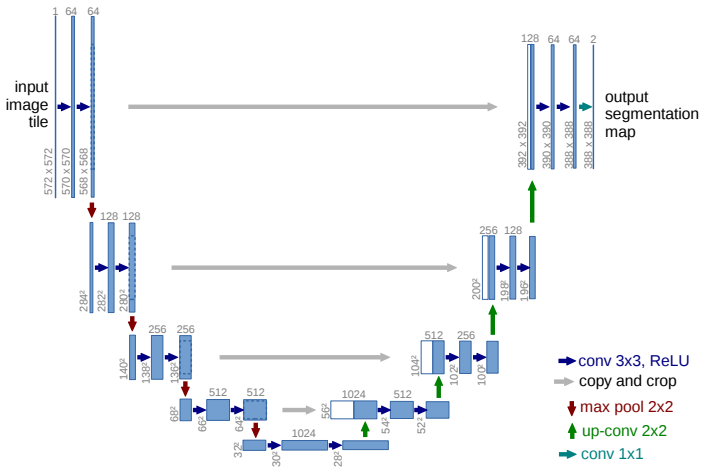

У нас в архитектуре все так же существует энкодер и декодер, как в **SegNet**, но отличительной особеностью данной модели являются *skip-conenctions*, соединяющие части декодера и энкодера. То есть для того чтобы передать на вход декодера тензор, мы конкатенируем симметричный выход с энкодера и выход предыдущего слоя декодера.

* Ronneberger, Olaf, Philipp Fischer, and Thomas Brox. "[U-Net: Convolutional networks for biomedical image segmentation.](https://arxiv.org/pdf/1505.04597.pdf)" International Conference on Medical image computing and computer-assisted intervention. Springer, Cham, 2015.

In [ ]:
class double_conv(nn.Module):
    """(conv => BN => ReLU) * 2"""

    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
        )

    def forward(self, x):
        x = self.conv(x)
        return x


class inconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(inconv, self).__init__()
        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x):
        x = self.conv(x)
        return x


class down(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(down, self).__init__()
        self.mpconv = nn.Sequential(nn.MaxPool2d(2), double_conv(in_ch, out_ch))

    def forward(self, x):
        x = self.mpconv(x)
        return x


class up(nn.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()

        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
        else:
            self.up = nn.ConvTranspose2d(in_ch // 2, in_ch // 2, 2, stride=2)

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2):
        x1 = self.up(x1)

        # input is CHW
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, (diffX // 2, diffX - diffX // 2, diffY // 2, diffY - diffY // 2))

        x = torch.cat([x2, x1], dim=1)
        return self.conv(x)


class outconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(outconv, self).__init__()
        self.conv = nn.Conv2d(in_ch, out_ch, 1)

    def forward(self, x):
        x = self.conv(x)
        return x


class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        self.inc = inconv(in_channels, 64)
        self.down1 = down(64, 128)
        self.down2 = down(128, 256)
        self.down3 = down(256, 512)
        self.down4 = down(512, 512)
        self.up1 = up(1024, 256, True)
        self.up2 = up(512, 128, True)
        self.up3 = up(256, 64, True)
        self.up4 = up(128, 64, True)
        self.outc = outconv(64, out_channels)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        x = self.outc(x)
        return x

In [ ]:
unet_model = UNet(3, 1).to(device)

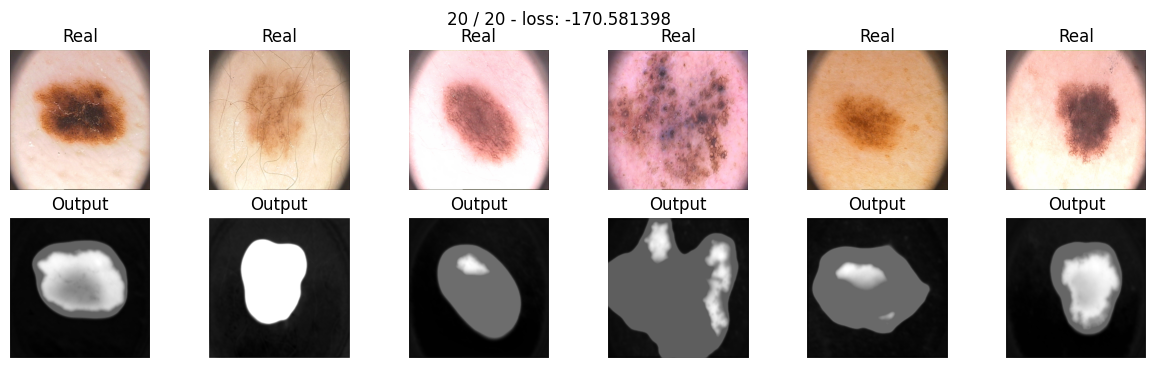

In [ ]:
train_losses, val_losses = train(unet_model, optim.Adam(unet_model.parameters()), bce_loss, 20, data_tr, data_val)

In [ ]:
score_model(unet_model, iou_score, data_val, threshold=0.5)

IoU Score: 0.22994689643383026
IoU Score: 0.21131233870983124
IoU Score: 0.3004058301448822
IoU Score: 0.3854422867298126
IoU Score: 0.4888579547405243


0.3231930613517761

In [ ]:
plot_learning_curve(train_losses, val_losses)

NameError: ignored

Новая модель путем изменения типа пулинга:

 **Max-Pooling** for the downsampling and **nearest-neighbor Upsampling** for the upsampling.

Down-sampling:

        conv = nn.Conv2d(3, 64, 3, padding=1)
        pool = nn.MaxPool2d(3, 2, padding=1)

Up-Sampling

        upsample = nn.Upsample(32)
        conv = nn.Conv2d(64, 64, 3, padding=1)

Замените max-pooling на convolutions с stride=2 и upsampling на transpose-convolutions с stride=2.


In [ ]:
 class UNet2(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet2, self).__init__()
        self.inc = inconv(in_channels, 64)
        self.down1 = down(64, 128)
        self.down2 = down(128, 256)
        self.down3 = down(256, 512)
        self.down4 = down(512, 512)
        self.up1 = up(1024, 256, False)
        self.up2 = up(512, 128, False)
        self.up3 = up(256, 64, False)
        self.up4 = up(128, 64, False)
        self.outc = outconv(64, out_channels)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        x = self.outc(x)
        return x

In [ ]:
unet2_model = UNet2(3, 1).to(device)


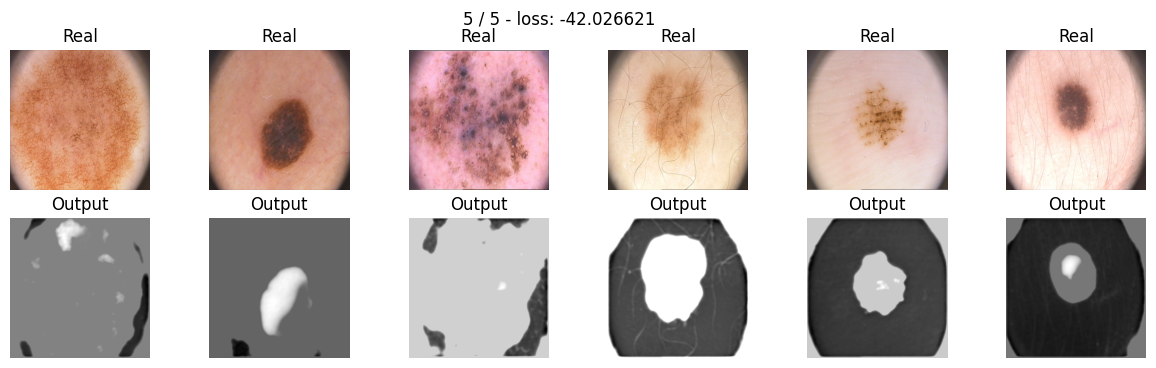

In [ ]:
train_losses, val_losses = train(unet2_model, optim.Adam(unet2_model.parameters()), bce_loss, 5, data_tr, data_val)

In [ ]:
score_model(unet2_model, iou_score, data_val, threshold=0.5)

IoU Score: 0.48698607087135315
IoU Score: 0.41722092032432556
IoU Score: 0.4132601320743561
IoU Score: 0.28300198912620544
IoU Score: 0.43610161542892456


0.407314145565033

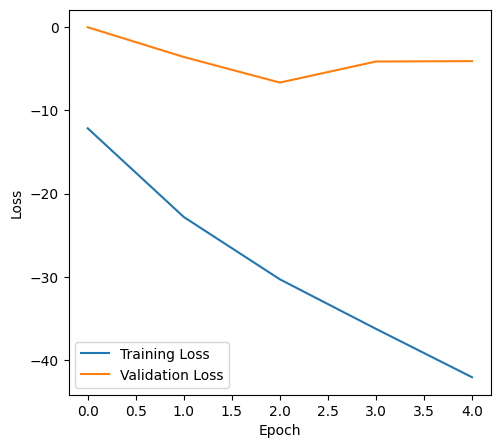

In [ ]:
plot_learning_curve(train_losses, val_losses)

Сделайте вывод, какая из моделей лучше

Модель UNET с transpose-convolutions лучше судя по IOU score, на 5 эпохах достигнуто IOU score = 40 %, для UNET с Upsampling на 20 эпохах достигнуто только IOU score = 32 %

# Отчет (6 баллов)

**SegNet with binary cross-entropy (BCE) loss**

Prediction threshold = 0.5
batch_size = 25

| Num epochs | LR | IOU score, % |
|-----------|-----------|-----------|
| 20 | 0.001 (Adam opt) | 59 |
| 30 | 0.001 (Adam opt) | 68 |
| 40 | 0.001 (Adam opt) | 80 |


**SegNet with dice loss**

Prediction threshold = 0.5
batch_size = 25

| Num epochs | LR | IOU score, % |
|-----------|-----------|-----------|
| 40 | 0.001 (Adam opt) | 70 |

**SegNet with focal loss**

Prediction threshold = 0.5
batch_size = 25

| Num epochs | LR | IOU score, % |
|-----------|-----------|-----------|
| 40 | 0.001 (Adam opt) | 70 |


**UNET Upsample with binary cross-entropy (BCE) loss**

Prediction threshold = 0.5
batch_size = 10

| Num epochs | LR | IOU score, % |
|-----------|-----------|-----------|
| 20 | 0.001 (Adam opt) | 32 |

**UNET Transpose with binary cross-entropy (BCE) loss**

Prediction threshold = 0.5
batch_size = 10

| Num epochs | LR | IOU score, % |
|-----------|-----------|-----------|
| 5 | 0.001 (Adam opt) | 41 |